In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

In [2]:
df = pd.read_csv('../input/imdb-reviews-cleaned/imdb_reviews_cleaned.csv')
df.head()

,review,sentiment,clean_reviews,clean_reviews_str,review_word_count,review_length
0,One of the other reviewers has mentioned that ...,positive,"['one', 'reviewer', 'ha', 'mentioned', 'watchi...",one reviewer ha mentioned watching oz episode ...,168,1098
1,A wonderful little production. <br /><br />The...,positive,"['wonderful', 'little', 'production', 'filming...",wonderful little production filming technique ...,86,646
2,I thought this was a wonderful way to spend ti...,positive,"['thought', 'wa', 'wonderful', 'way', 'spend',...",thought wa wonderful way spend time hot summer...,88,583
3,Basically there's a family where a little boy ...,negative,"['basically', 'family', 'little', 'boy', 'jake...",basically family little boy jake think zombie ...,64,425
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"['petter', 'matteis', 'love', 'time', 'money',...",petter matteis love time money visually stunni...,126,846


In [3]:
df['sentiment'].replace('positive', 1, inplace=True)
df['sentiment'].replace('negative', 0, inplace=True)

In [4]:
X = df['clean_reviews_str']

y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
cv = CountVectorizer(min_df=0, max_df=1, ngram_range=(1,2))

X_train = cv.fit_transform(X_train)

X_test = cv.transform(X_test)

print(X_train.shape, X_test.shape)

(40000, 2023611) (10000, 2023611)


In [6]:
logr = linear_model.LogisticRegression()

model_logr = logr.fit(X_train, y_train)

y_pred_logr = model_logr.predict(X_test)

In [7]:
print(classification_report(y_test, y_pred_logr))

print('The accuracy score is:', accuracy_score(y_test, y_pred_logr))
print('The precision score is:', precision_score(y_test, y_pred_logr))
print('The recall score is:', recall_score(y_test, y_pred_logr))
print('The f1_score is:', f1_score(y_test, y_pred_logr))

              precision    recall  f1-score   support

           0       0.63      0.83      0.72      4948
           1       0.76      0.52      0.62      5052

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.67     10000
weighted avg       0.70      0.68      0.67     10000

The accuracy score is: 0.6757
The precision score is: 0.7601380500431406
The recall score is: 0.5231591448931117
The f1_score is: 0.6197678508617659


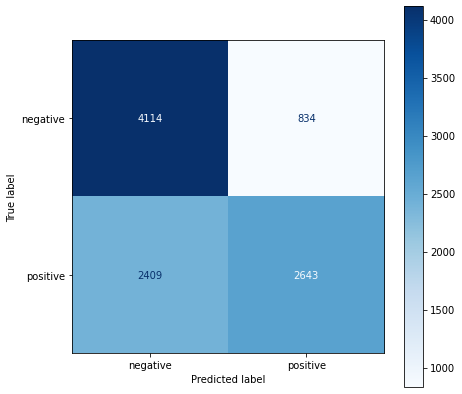

In [8]:
from sklearn.metrics import plot_confusion_matrix
rcParams['figure.figsize'] = 7,7

plot_confusion_matrix(model_logr, X_test, y_test, display_labels=['negative', 'positive'], cmap=plt.cm.Blues, normalize=None);

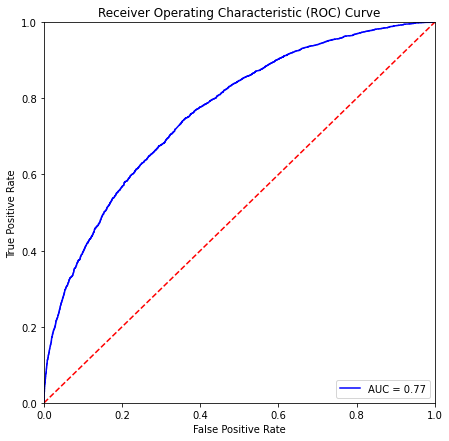

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

probs = logr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

training and testing accuracy | training and testing loss
loss function
precision vs recall plot